In [1]:
import pandas as pd
import numpy as np

In [ ]:
books=pd.read_csv("Books.csv")
rating=pd.read_csv("Ratings.csv")
users=pd.read_csv("Users.csv")

C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\2493730944.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("Books.csv")


In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [38]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [39]:
books.shape

(0, 8)

In [5]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
books.shape

(271360, 8)

In [8]:
rating.shape

(1149780, 3)

In [9]:
users.shape

(278858, 3)

In [10]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [11]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [12]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
books.duplicated().sum()

np.int64(0)

In [15]:
rating.duplicated().sum()

np.int64(0)

In [16]:
users.duplicated().sum()

np.int64(0)

In [18]:
books.isnull().dtypes

ISBN                   bool
Book-Title             bool
Book-Author            bool
Year-Of-Publication    bool
Publisher              bool
Image-URL-S            bool
Image-URL-M            bool
Image-URL-L            bool
dtype: object

In [19]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [40]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str)

# Replace non-numeric years with NaN
books.loc[~books['Year-Of-Publication'].str.isnumeric(), 'Year-Of-Publication'] = None

# Convert to numeric and handle missing
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Optional: Filter out unrealistic years
books = books[(books['Year-Of-Publication'] >= 1800) & (books['Year-Of-Publication'] <= 2025)]



In [41]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [42]:

# Step 1: Load original file

# Step 2: Convert year to string for checking
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str)

# Step 3: Clean non-numeric years
books.loc[~books['Year-Of-Publication'].str.isnumeric(), 'Year-Of-Publication'] = None

# Step 4: Convert to numeric safely
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# ✅ Step 5: Check how many rows left after filtering
print("Before filtering:", books.shape)

# Step 6: Filter valid range only if rows > 0
books = books[(books['Year-Of-Publication'].between(1800, 2025)) | (books['Year-Of-Publication'].isna())]

print("After filtering:", books.shape)

# Step 7: Handle missing authors/publishers
books['Book-Author'].fillna('Unknown Author', inplace=True)
books['Publisher'].fillna('Unknown Publisher', inplace=True)

# Step 8: Show data
print(books.head())


Before filtering: (0, 8)
After filtering: (0, 8)
Empty DataFrame
Columns: [ISBN, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\315614423.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book-Author'].fillna('Unknown Author', inplace=True)
C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\315614423.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [22]:
import matplotlib.pyplot as  plt


Top 10 Authors:
 Book-Author
Agatha Christie        598
William Shakespeare    559
Stephen King           511
Ann M. Martin          423
Carolyn Keene          372
Francine Pascal        372
Isaac Asimov           328
Nora Roberts           313
Barbara Cartland       307
Charles Dickens        295
Name: count, dtype: int64

Top 10 Publishers:
 Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3870
Ballantine Books            3764
Bantam Books                3642
Scholastic                  3157
Simon &amp; Schuster        2965
Penguin Books               2843
Berkley Publishing Group    2767
Penguin USA                 2714
Name: count, dtype: int64


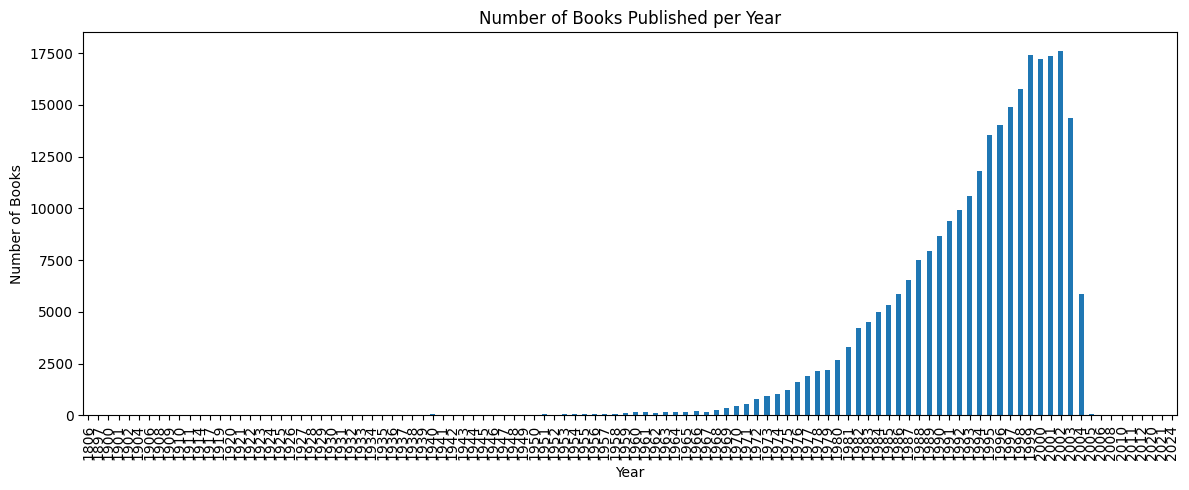


Top Book Titles:
 Book-Title
Selected Poems                    27
Little Women                      22
Dracula                           20
Wuthering Heights                 20
Adventures of Huckleberry Finn    20
The Secret Garden                 18
The Night Before Christmas        18
Pride and Prejudice               17
Jane Eyre                         16
Masquerade                        16
Name: count, dtype: int64


In [23]:
top_authors = books['Book-Author'].value_counts().head(10)
print("\nTop 10 Authors:\n", top_authors)

# Step 6: Top 10 Publishers
top_publishers = books['Publisher'].value_counts().head(10)
print("\nTop 10 Publishers:\n", top_publishers)

# Step 7: Year-wise Book Counts
plt.figure(figsize=(12,5))
books['Year-Of-Publication'].dropna().astype(int).value_counts().sort_index().plot(kind='bar')
plt.title('Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.show()

# Step 8: Most Common Book Titles
top_titles = books['Book-Title'].value_counts().head(10)
print("\nTop Book Titles:\n", top_titles)

In [32]:


# Convert 'Year-Of-Publication' to string first
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str)

# Handle non-numeric years
books.loc[~books['Year-Of-Publication'].str.isnumeric(), 'Year-Of-Publication'] = None
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Filter unrealistic years

# Handle missing Book-Author
books['Book-Author'].fillna('Unknown Author', inplace=True)

# Handle missing Publisher
books['Publisher'].fillna('Unknown Publisher', inplace=True)

# Handle missing Image URLs
books['Image-URL-S'].fillna('No Image', inplace=True)
books['Image-URL-M'].fillna('No Image', inplace=True)
books['Image-URL-L'].fillna('No Image', inplace=True)

# Final check
print("✅ Missing values handled successfully!")
print(books.isnull().sum())


✅ Missing values handled successfully!
ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\1685497107.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book-Author'].fillna('Unknown Author', inplace=True)
C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\1685497107.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [37]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [25]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [27]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [28]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [29]:


# Step 1: Overview
print("Missing Values Before:\n", users.isnull().sum())

# Step 2: Handle Missing Values Smartly
for col in users.columns:
    if users[col].dtype == 'object':
        users[col].fillna('Unknown', inplace=True)
    elif users[col].dtype in ['int64', 'float64']:
        users[col].fillna(users[col].median(), inplace=True)

# Step 3: Final Check
print("\nMissing Values After Handling:\n", users.isnull().sum())


Missing Values Before:
 User-ID          0
Location         0
Age         110762
dtype: int64

Missing Values After Handling:
 User-ID     0
Location    0
Age         0
dtype: int64


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\3921571373.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users[col].fillna(users[col].median(), inplace=True)
C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\3921571373.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [30]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [35]:
# popularity based recommendation system
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [36]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
rating_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [43]:
books=pd.read_csv("Books.csv")

C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\1463327289.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv("Books.csv")


In [44]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [46]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [94]:
print("Before filling:", books['Book-Author'].isna().sum())

books['Book-Author'].fillna('Unknown Author', inplace=True)

print("After filling:", books['Book-Author'].isna().sum())


Before filling: 0
After filling: 0


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\1379104426.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book-Author'].fillna('Unknown Author', inplace=True)
C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\1379104426.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Book-Author'].fillna('Unknown Author', inplace=True)

In [95]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Unknown Author,2002,Unknown Publisher,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Unknown Author,2001,Unknown Publisher,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Unknown Author,1991,Unknown Publisher,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Unknown Author,1999,Unknown Publisher,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,Unknown Author,1999,Unknown Publisher,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [96]:
# Step 1: Replace empty strings (if any) with NaN
books['Book-Author'] = books['Book-Author'].replace('', pd.NA)

# Step 2: Fill only missing values with 'Unknown Author'
books['Book-Author'].fillna('Unknown Author', inplace=True)


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\743683284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Book-Author'] = books['Book-Author'].replace('', pd.NA)
C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\743683284.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  b

In [97]:
print("Missing values:", books['Book-Author'].isna().sum())
print(books['Book-Author'].value_counts().head(10))  # Top 10 authors


Missing values: 0
Book-Author
Unknown Author    266728
Name: count, dtype: int64


In [98]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Unknown Author,2002,Unknown Publisher,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Unknown Author,2001,Unknown Publisher,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Unknown Author,1991,Unknown Publisher,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Unknown Author,1999,Unknown Publisher,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,Unknown Author,1999,Unknown Publisher,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [99]:
books = pd.read_csv('Books.csv')  # Or your original file


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\4111143126.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')  # Or your original file


In [100]:
print("Missing values:", books['Book-Author'].isna().sum())
print("Blank strings:", (books['Book-Author'] == '').sum())


Missing values: 2
Blank strings: 0


In [101]:
books['Book-Author'] = books['Book-Author'].replace('', pd.NA)
books['Book-Author'].fillna('Unknown Author', inplace=True)


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\4256080263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book-Author'].fillna('Unknown Author', inplace=True)


In [102]:
print(books['Book-Author'].value_counts().head(10))


Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: count, dtype: int64


In [103]:
print("Missing values:", books['Publisher'].isna().sum())
print("Blank strings:", (books['Publisher'] == '').sum())


Missing values: 2
Blank strings: 0


In [104]:
books['Publisher'] = books['Publisher'].replace('', pd.NA)
books['Publisher'].fillna('Unknown Publisher', inplace=True)


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\3975883144.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Publisher'].fillna('Unknown Publisher', inplace=True)


In [105]:
print(books['Publisher'].value_counts().head(10))  # Should show real publisher names


Publisher
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: count, dtype: int64


In [109]:
print("Missing:", books['Image-URL-S'].isna().sum())
print("Missing:", books['Image-URL-M'].isna().sum())
print("Missing:", books['Image-URL-L'].isna().sum())
print("Blank strings:", (books['Image-URL-L'] == '').sum())


Missing: 0
Missing: 0
Missing: 0
Blank strings: 0


In [110]:
books['Image-URL-L'] = books['Image-URL-S'].replace('', pd.NA)
books['Image-URL-L'] = books['Image-URL-M'].replace('', pd.NA)
books['Image-URL-L'] = books['Image-URL-L'].replace('', pd.NA)
books['Image-URL-L'].fillna('https://example.com/placeholder.jpg', inplace=True)  # Use a default image URL


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\3560773781.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Image-URL-L'].fillna('https://example.com/placeholder.jpg', inplace=True)  # Use a default image URL


In [ ]:
books['Book-Author'].fillna('Unknown Author', inplace=True)

# Handle missing Publisher
books['Publisher'].fillna('Unknown Publisher', inplace=True)

# Handle missing Image URLs
books['Image-URL-S'].fillna('No Image', inplace=True)
books['Image-URL-M'].fillna('No Image', inplace=True)
books['Image-URL-L'].fillna('No Image', inplace=True)

C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\844087234.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['Book-Author'].fillna('Unknown Author', inplace=True)
C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\844087234.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [111]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [112]:
books.isnull().sum().dtypes

dtype('int64')

In [113]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [114]:
books['Year-Of-Publication'].dtype

dtype('O')

In [115]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(str)

# Step 3: Clean non-numeric years
books.loc[~books['Year-Of-Publication'].str.isnumeric(), 'Year-Of-Publication'] = None

# Step 4: Convert to numeric safely
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

In [116]:
books['Year-Of-Publication'].dtypes

dtype('float64')

In [117]:
# Step 4: Convert to numeric safely and then to integer
books['Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# After filtering the valid range
books = books[(books['Year-Of-Publication'].between(1800, 2025)) | (books['Year-Of-Publication'].isna())]

# Convert 'Year-Of-Publication' to integer after cleaning
books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(0).astype(int)

# Check if it's now an integer column
print(books['Year-Of-Publication'].dtype)


int64


C:\Users\sachin\AppData\Local\Temp\ipykernel_4140\3999356560.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books['Year-Of-Publication'] = books['Year-Of-Publication'].fillna(0).astype(int)


In [118]:
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [119]:
rating_with_name=rating.merge(books,on='ISBN')
rating_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...
...,...,...,...,...,...,...,...,...,...,...
1017067,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...,http://images.amazon.com/images/P/0876044011.0...
1017068,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...,http://images.amazon.com/images/P/1563526298.0...
1017069,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...,http://images.amazon.com/images/P/0679447156.0...
1017070,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...,http://images.amazon.com/images/P/0515107662.0...


In [120]:
rating_with_name.shape

(1017072, 10)

In [121]:
num_raring_df=rating_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_raring_df


,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
237447,Ã?Â?lpiraten.,2
237448,Ã?Â?rger mit Produkt X. Roman.,4
237449,Ã?Â?sterlich leben.,1
237450,Ã?Â?stlich der Berge.,3


In [122]:
num_raring_df.rename(columns={'Book-Rating':'num_rating'},inplace=True)

In [123]:
num_raring_df

,Book-Title,num_rating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
237447,Ã?Â?lpiraten.,2
237448,Ã?Â?rger mit Produkt X. Roman.,4
237449,Ã?Â?sterlich leben.,1
237450,Ã?Â?stlich der Berge.,3


In [124]:
# Ensure Book-Rating is numeric
rating_with_name['Book-Rating'] = pd.to_numeric(rating_with_name['Book-Rating'], errors='coerce')

# Then calculate average rating
avg_rating_df = rating_with_name.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)


In [127]:
rating_with_name = rating_with_name.dropna(subset=['Book-Rating'])


In [128]:
print(rating_with_name['Book-Rating'].dtype)


int64


In [129]:
avg_rating_df = rating_with_name.groupby('Book-Title')[['Book-Rating']].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)


In [130]:
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
237447,Ã?Â?lpiraten.,0.000000
237448,Ã?Â?rger mit Produkt X. Roman.,5.250000
237449,Ã?Â?sterlich leben.,7.000000
237450,Ã?Â?stlich der Berge.,2.666667


In [131]:
popular_df=num_raring_df.merge(avg_rating_df,on='Book-Title')

In [132]:
popular_df

,Book-Title,num_rating,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
237447,Ã?Â?lpiraten.,2,0.000000
237448,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
237449,Ã?Â?sterlich leben.,1,7.000000
237450,Ã?Â?stlich der Berge.,3,2.666667


In [133]:
popular_df=popular_df[popular_df['num_rating']>=250].sort_values('avg_rating',ascending=False).head(50)
popular_df

,Book-Title,num_rating,avg_rating
79029,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
79017,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
79036,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
79021,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
79009,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
188468,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
184245,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
79040,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
208197,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
216482,To Kill a Mockingbird,510,4.700000


In [134]:
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')

,Book-Title,num_rating,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,0345339681,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,0345339703,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,059035342X,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,0345339711,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,0446310786,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


In [135]:
popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title').shape

(50, 10)

In [136]:
popular_df=popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Image-URL-M','num_rating','avg_rating']]

In [137]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [ ]:
# collaborating based recommendation system
x=rating_with_name.groupby('User-ID').count()['Book-Rating']>200
padhe_likhe_users=x[x].index
padhe_likhe_users

Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,   6323,
         6543,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=800)

In [146]:
filtered_rating=rating_with_name[rating_with_name['User-ID'].isin(padhe_likhe_users)]
filtered_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1111,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1112,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1113,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1114,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1115,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...
...,...,...,...,...,...,...,...,...,...,...
1015340,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...
1015341,275970,3411086211,10,Die Biene.,Sybil GrÃ?Â¤fin SchÃ?Â¶nfeldt,1993,"Bibliographisches Institut, Mannheim",http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...,http://images.amazon.com/images/P/3411086211.0...
1015342,275970,3829021860,0,The Penis Book,Joseph Cohen,1999,Konemann,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...,http://images.amazon.com/images/P/3829021860.0...
1015343,275970,4770019572,0,Musashi,Eiji Yoshikawa,1995,Kodansha International (JPN),http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...,http://images.amazon.com/images/P/4770019572.0...


In [151]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books=y[y].index

In [152]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=698)

In [154]:
final_rating=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1111,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1124,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1126,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1129,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1135,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1015179,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1015180,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1015253,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1015292,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [155]:
final_rating.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1111,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1124,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1126,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1129,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1135,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1015179,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1015180,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1015253,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1015292,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [159]:
pt=final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [174]:
popular_df['Image-URL-M'][0]

'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'

In [160]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [161]:
pt.fillna(0,inplace=True)

In [162]:
pt 


User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
from sklearn.metrics.pairwise import cosine_similarity

In [191]:
similarity_score=cosine_similarity(pt)
similarity_score

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04402619],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14549498],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.11012672],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0200112 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.1081564 ],
       [0.04402619, 0.14549498, 0.11012672, ..., 0.0200112 , 0.1081564 ,
        1.        ]])

In [192]:
similarity_score.shape

(698, 698)

In [193]:
# create a function to recommend the book
def recommend(Book_name):
    index=np.where(pt.index==Book_name)[0][0]
    similar_items=sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]
    data=[]
    for i in similar_items:
        item=[]
        temp_df=books[books['Book-Title']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        data.append(item)
    return data
    


    
    

In [200]:
recommend('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg']]

In [195]:
import pickle

In [197]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity_score,open('similarity_score','wb'))

In [199]:
pt.index

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=698)

KeyError: 'image-URL-M'

NameError: name 'data' is not defined

In [175]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


In [176]:
import pickle

In [177]:
pickle.dump(popular_df,open('popular.pkl','wb'))

In [138]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [139]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [92]:
popular_df

,Book-Title,Book-Author,Image-URL-M,num_rating,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),Unknown Author,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),Unknown Author,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),Unknown Author,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,Unknown Author,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),Unknown Author,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,Unknown Author,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,Unknown Author,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,Unknown Author,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",Unknown Author,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Unknown Author,http://images.amazon.com/images/P/0446310786.0...,510,4.700000
